### SARIMA model example
* https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read in csv file
portland = pd.read_csv("Resources/PortlandMonthlyAvgRides.csv")

In [3]:
portland.head(10)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
5,1960-06,622
6,1960-07,617
7,1960-08,613
8,1960-09,661
9,1960-10,695


In [4]:
# Rename column
portland.rename(columns={'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114':'Avg_monthly_rides'}, inplace=True)

In [5]:
# Find and drop na
portland.isna().sum()

Month                1
Avg_monthly_rides    1
dtype: int64

In [6]:
portland.dropna()

,Month,Avg_monthly_rides
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [12]:
# drop last row
portland.drop(portland.index[114], inplace=True)


In [13]:
portland.tail()

,Month,Avg_monthly_rides
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [14]:
# change datatypes
portland['Month'] =  pd.to_datetime(portland['Month'])
portland["Avg_monthly_rides"] = pd.to_numeric(portland["Avg_monthly_rides"])

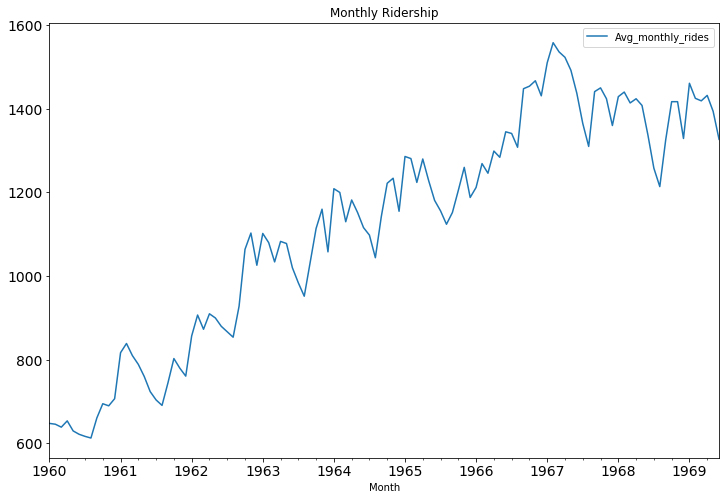

In [15]:
# basic plot
portland.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14, x="Month", y = "Avg_monthly_rides")


C:\Users\Lenovo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

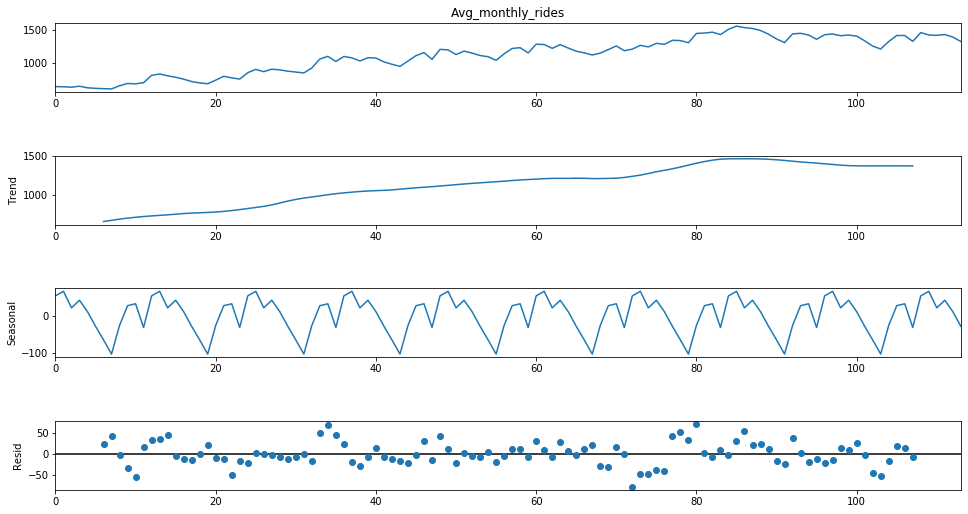

In [16]:
decomposition = seasonal_decompose(portland.Avg_monthly_rides, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

### Taking a look at Autocorrelation



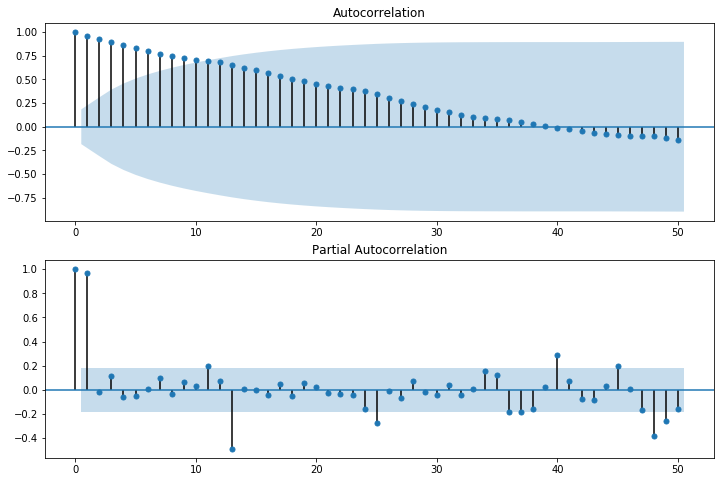

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(portland['Avg_monthly_rides'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(portland['Avg_monthly_rides'], lags=50, ax=ax2)
plt.show()

In [18]:
print(sm.tsa.stattools.adfuller(portland['Avg_monthly_rides']))

(-1.536597144453159, 0.5153358797821738, 12, 101, {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}, 1028.4238367341432)


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window=12, cutoff=0.1):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

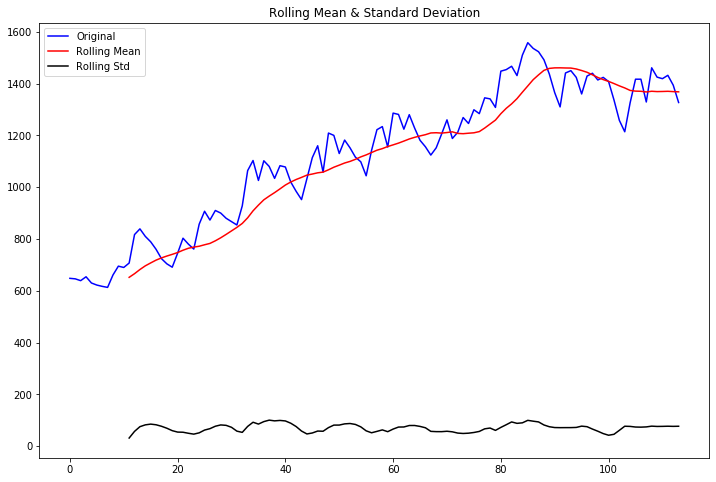

Results of Dickey-Fuller Test:
p-value = 0.5153. The series is likely non-stationary.
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [28]:
# the smaller p-value, the more likely it's stationary.
test_stationarity(portland['Avg_monthly_rides'])

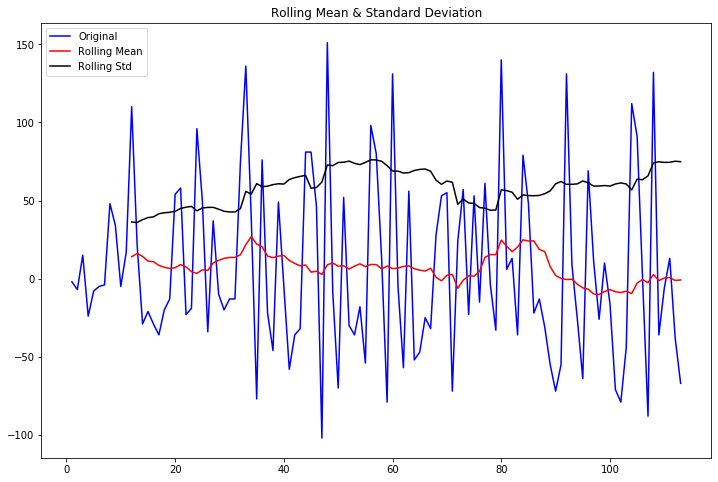

Results of Dickey-Fuller Test:
p-value = 0.3141. The series is likely non-stationary.
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [29]:
# To get a stationary data, there's many techiniques. We can use log, differencing etc

first_diff = portland.Avg_monthly_rides - portland.Avg_monthly_rides.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

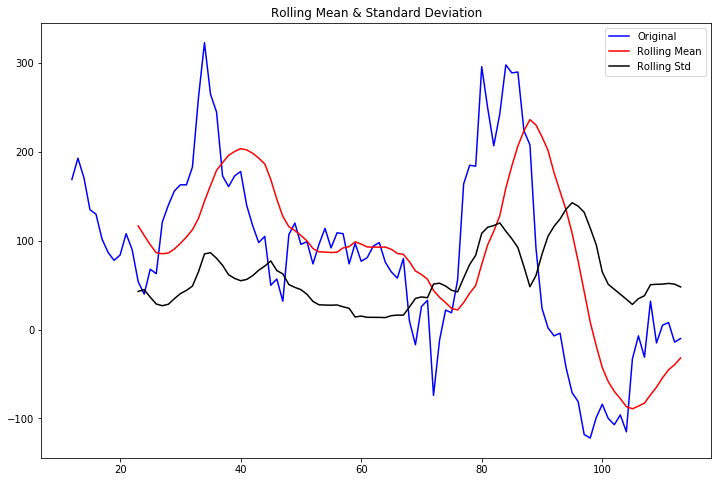

Results of Dickey-Fuller Test:
p-value = 0.3488. The series is likely non-stationary.
Test Statistic                  -1.864831
p-value                          0.348782
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [31]:
# Test Seasonal difference

seasonal_diff = portland.Avg_monthly_rides - portland.Avg_monthly_rides.shift(12)
seasonal_diff = seasonal_diff.dropna(inplace = False)
test_stationarity(seasonal_diff)